In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve


In [18]:
csv_file_path="~/code/ArjanAngenent/VinoDine/raw_data/Cleaned_Full_100K_wines.csv"

In [61]:
wine_df = pd.read_csv(csv_file_path)
wine_df

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100003,Cabernet Sauvignon,Red,Varietal/100%,CabernetSauvignon,Beef,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
1,100003,Cabernet Sauvignon,Red,Varietal/100%,CabernetSauvignon,Lamb,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
2,100003,Cabernet Sauvignon,Red,Varietal/100%,CabernetSauvignon,Poultry,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,CabernetSauvignon,Beef,11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
4,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,Merlot,Beef,11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527951,200795,Rotleiten,Red,Assemblage/Blend,CabernetSauvignon,SpicyFood,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."
527952,200795,Rotleiten,Red,Assemblage/Blend,CabernetSauvignon,MaturatedCheese,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."
527953,200795,Rotleiten,Red,Assemblage/Blend,CabernetSauvignon,HardCheese,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."
527954,200795,Rotleiten,Red,Assemblage/Blend,CabernetSauvignon,Poultry,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."


In [56]:
# features to select: Type, Elaborate, Grapes, ABV, Body, Acidity
# target: harmonize
y = wine_df['Harmonize']
X = wine_df[['Type', 'ABV', 'Body', 'Acidity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Create Ordinal Enoder for Acidity with 3 categories ['High', 'Medium', 'Low']
# ordinal_encoder = OrdinalEncoder(categories=[['High', 'Medium', 'Low']])

# Create StandardScaler for ABV(numerical feeature)
standard_scaler = StandardScaler()

# fit_transform encoders and scalers to X_train

X_train[ohe.get_feature_names_out()] = ohe.fit_transform(X_train[['Type','Body','Acidity']])

# X_train['encoded_acidicity'] = ordinal_encoder.fit_transform(X_train[['Acidity']])

X_train['ABV'] = standard_scaler.fit_transform(X_train[['ABV']])

X_train.drop(columns=['Type','Body', 'Acidity'], inplace=True)

# transform X_test with encoders and scalers
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['Type','Body','Acidity']])

# X_test['encoded_acidicity'] = ordinal_encoder.transform(X_test[['Acidity']])

X_test['ABV'] = standard_scaler.transform(X_test[['ABV']])

X_test.drop(columns=['Type', 'Body', 'Acidity'], inplace=True)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((369569, 15), (158387, 15), (369569,), (158387,))

In [58]:
X_train.head()

,ABV,Type_Dessert,Type_Dessert/Port,Type_Red,Type_Rosé,Type_Sparkling,Type_White,Body_Full-bodied,Body_Light-bodied,Body_Medium-bodied,Body_Very full-bodied,Body_Very light-bodied,Acidity_High,Acidity_Low,Acidity_Medium
93128,-0.631335,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
421330,0.089598,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
214775,0.089598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
211639,0.089598,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90833,0.450065,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
# took out Grapes column

model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(np.array(X_train), y_train)

# Use the trained model to predict
prediction = model.predict(X_test)

# 5-Fold Cross validate model
cv_results = cross_validate(model, X_train, y_train, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()

accuracy

/home/arjanange/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.20411614951590065

In [64]:
from sklearn.metrics import classification_report
print(classification_report(prediction,y_test))

/home/arjanange/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arjanange/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 precision    recall  f1-score   support

      Appetizer       0.00      0.14      0.00         7
           Beef       0.80      0.24      0.37     82160
     BlueCheese       0.00      0.00      0.00        27
      CuredMeat       0.05      0.07      0.06      3209
   FruitDessert       0.00      0.00      0.00         0
       GameMeat       0.00      0.08      0.00        12
     GoatCheese       0.00      0.00      0.00         0
     HardCheese       0.00      0.07      0.00        97
           Lamb       0.15      0.20      0.17     12821
       LeanFish       0.00      0.00      0.00         0
MaturatedCheese       0.02      0.26      0.03       254
      Mushrooms       0.00      0.00      0.00         0
          Pasta       0.00      0.00      0.00         0
           Pork       0.11      0.14      0.12      7372
        Poultry       0.06      0.20      0.09      6855
       RichFish       0.21      0.17      0.19      8642
      Shellfish       0.57    

/home/arjanange/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1000),
                                                              X = X_train, 
                                                              y = y_train, 
                                                              train_sizes = [1000,3000,4000,5000,6000,7000,8000, 10000], 
                                                              cv = 5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [53]:

matrix=X_train.corr()



Text(0.5, 1.03, 'Correlation Matrix')

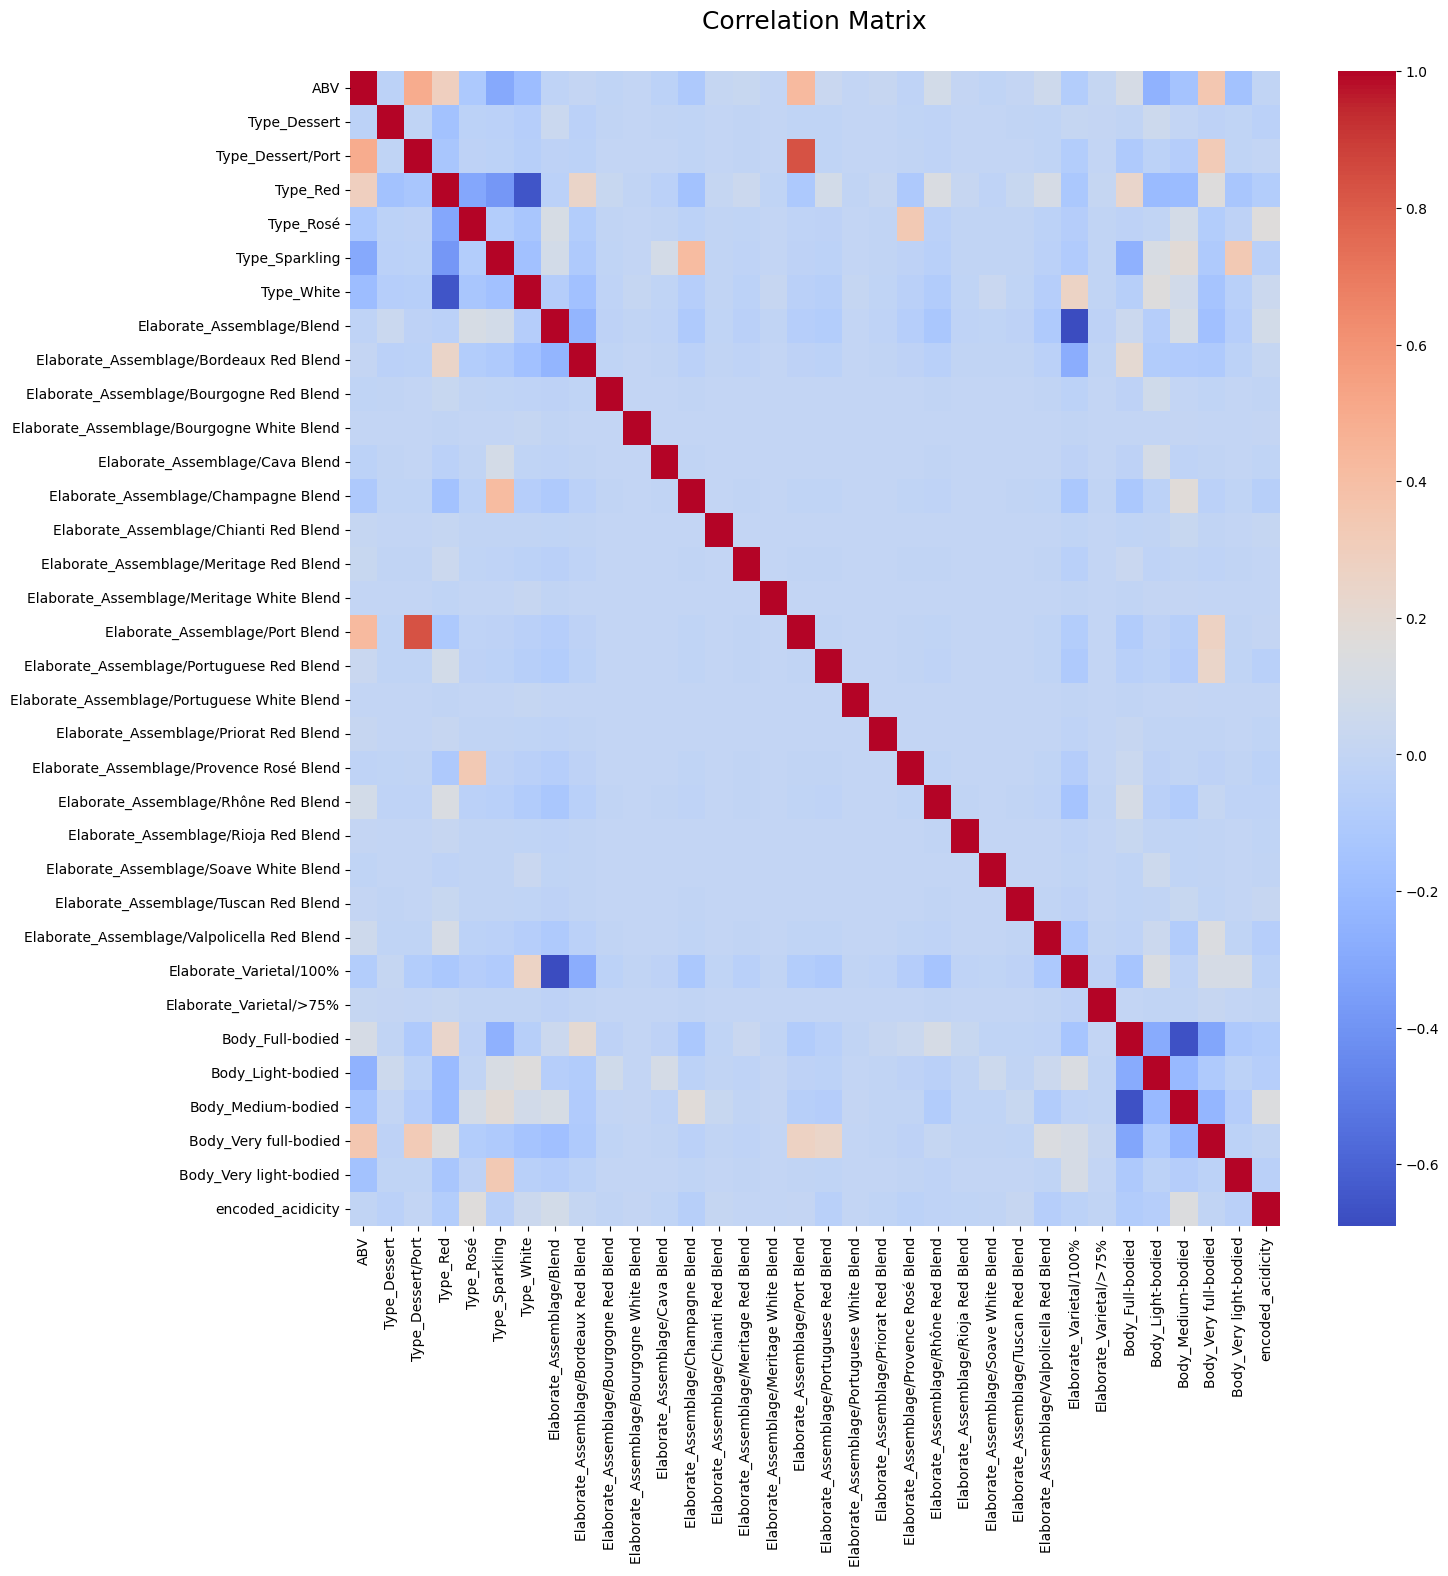

In [55]:
# Plot the correlation matrix

plt.figure(figsize=(15,15))
sns.heatmap(matrix, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize = 18, y = 1.03)

Feature Permutation

In [66]:
from sklearn.inspection import permutation_importance

In [69]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

permutation_score = permutation_importance(model, X_train, y_train, n_repeats=5) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False, inplace=True, ignore_index=True) # Order by importance
importance_df

,feature,feature importance
0,Type_Red,0.038555
1,Type_White,0.026229
2,Acidity_High,0.009373
3,Body_Medium-bodied,0.008204
4,Body_Full-bodied,0.007723
5,Body_Light-bodied,0.005099
6,Body_Very full-bodied,0.004254
7,Type_Sparkling,0.003941
8,Type_Dessert/Port,0.003101
9,Acidity_Medium,0.001586


In [ ]:
## Remove weak features

# I want to get rid of features which caused less than this  in terms of performance
threshold = 0.05 

# Decompose this one-liner piece of code step by step if you don't understand it at first sight!
weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
weak_features

In [75]:
## Cross validating the model with strong features only
X_train_strong_features = X_train.drop(columns=["ABV"])

print(f"Our strong features are {list(X_train_strong_features.columns)}")

model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X_train_strong_features, y_train, cv = 5)
strong_model_score = scores.mean()

# print(f"Before removing weak features, the cross-validated accuracy was equal to {round(scores,2)}")

print(f"The LogisticRegression fitted with the strong features only has a score of {round(strong_model_score,2)}")

Our strong features are ['Type_Dessert', 'Type_Dessert/Port', 'Type_Red', 'Type_Rosé', 'Type_Sparkling', 'Type_White', 'Body_Full-bodied', 'Body_Light-bodied', 'Body_Medium-bodied', 'Body_Very full-bodied', 'Body_Very light-bodied', 'Acidity_High', 'Acidity_Low', 'Acidity_Medium']
The LogisticRegression fitted with the strong features only has a score of 0.2


In [76]:
print(f"The LogisticRegression fitted with the strong features only has a score of {round(strong_model_score,4)}")

The LogisticRegression fitted with the strong features only has a score of 0.2047


Remove Food categories from X and y

In [82]:
wine_df.shape


(527956, 17)

In [86]:
wine_df=wine_df[(wine_df["Harmonize"] != "FruitDessert") & (wine_df["Harmonize"] != "GoatCheese") & (wine_df["Harmonize"] != "LeanFish") & (wine_df["Harmonize"] != "Mushrooms") & (wine_df["Harmonize"] != "Pasta") & (wine_df["Harmonize"] != "SweetDessert")]
wine_df.shape

(487756, 17)

In [88]:
# features to select: Type, Elaborate, Grapes, ABV, Body, Acidity
# target: harmonize
y = wine_df['Harmonize']
X = wine_df[['Type', 'ABV', 'Body', 'Acidity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Create Ordinal Enoder for Acidity with 3 categories ['High', 'Medium', 'Low']
# ordinal_encoder = OrdinalEncoder(categories=[['High', 'Medium', 'Low']])

# Create StandardScaler for ABV(numerical feeature)
standard_scaler = StandardScaler()

# fit_transform encoders and scalers to X_train

X_train[ohe.get_feature_names_out()] = ohe.fit_transform(X_train[['Type','Body','Acidity']])

# X_train['encoded_acidicity'] = ordinal_encoder.fit_transform(X_train[['Acidity']])

X_train['ABV'] = standard_scaler.fit_transform(X_train[['ABV']])

X_train.drop(columns=['Type','Body', 'Acidity'], inplace=True)

# transform X_test with encoders and scalers
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['Type','Body','Acidity']])

# X_test['encoded_acidicity'] = ordinal_encoder.transform(X_test[['Acidity']])

X_test['ABV'] = standard_scaler.transform(X_test[['ABV']])

X_test.drop(columns=['Type', 'Body', 'Acidity'], inplace=True)

In [89]:
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(np.array(X_train), y_train)

# Use the trained model to predict
prediction = model.predict(X_test)

# 5-Fold Cross validate model
cv_results = cross_validate(model, X_train, y_train, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()

accuracy

/home/arjanange/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.21933989171494775